# [IAPR][iapr]: Lab 2 ‒  Object description

**Group ID:** 44

**Author 1 (sciper):** Paul Véronique Guillaume DEVIANNE (311030)

**Author 2 (sciper):** Rizhong LIN (366842)

**Release date:** 24.03.2023  
**Due date:** 07.04.2023 (11:59 pm)


## Important notes

The lab assignments are designed to teach practical implementation of the topics presented during class well as
preparation for the final project, which is a practical project which ties together the topics of the course.

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external
functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation
in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook <font color='red'> rerun </font>the notebook from scratch !**
`Kernel` > `Restart & Run All`

We will not rerun the notebook for you.


[iapr]: https://github.com/LTS5/iapr

---
## 0. Extract relevant data
We first need to extract the `lab-02-data.tar.gz` archive.
To this end, we use the [tarfile] module from the Python standard library. In the `lab-02-data` folder, you will find 28x28 grey-scale pictures of handwritten "0", "1", "2" and "3".
These digits have been extracted from MNIST dataset (http://yann.lecun.com/exdb/mnist/).

[tarfile]: https://docs.python.org/3.6/library/tarfile.html

In [124]:
import tarfile
import os
data_base_path = os.path.join(os.pardir, 'data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

### 0.1. Data visualization

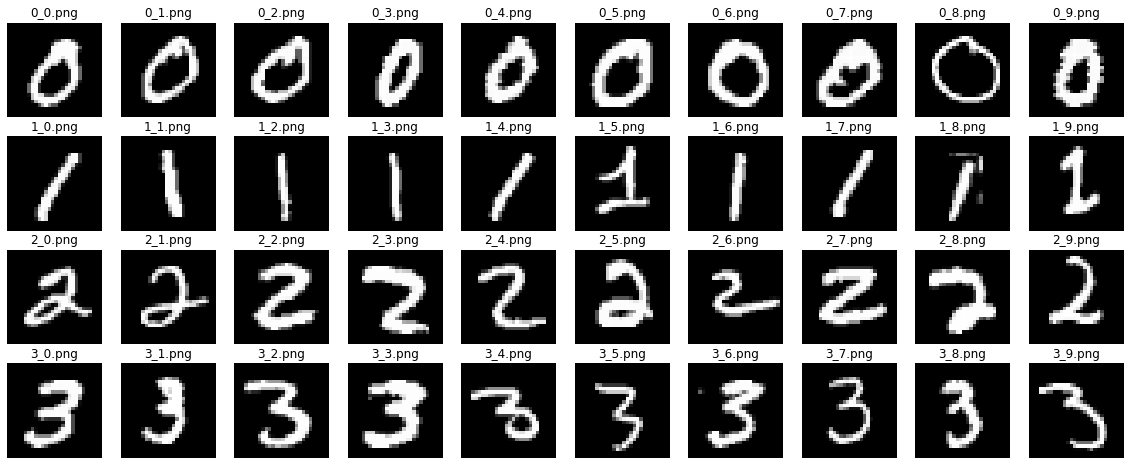

In [125]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.context = 'White'

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

---
## Part 1 - contour based descriptors (18 pts)

In this part you will use images of "0"s and "1"s.

**Objectives overview**: Fourier Descriptors


**1)** *Preprocess*: Select ONLY "0" and "1" images and apply suitable preprocessing. Show a plot with the preprocessed data and give arguments on the chosen techniques. (**2 pts**)


**2)** *Get descriptors*: Find the contours and get the Fourier descriptors in complex definition. *Note*: The contours arrays should contain a finite number (N-> self-chosen) of equi-distant points for each image (hint: interpolation). In the case of the "0" contours, just keep the outermost contour. Discuss the necessity of this format. (**4 pts**)
    
    
**3)** *Study effect of descriptors* : Show the contour-reconstruction of the digits using different amount of descriptors (both for ONE "0" image and ONE "1" image)
- Make 5 plots, reconstructing the digits' countours using different amounts of descriptors. (e.g. reconstruct the contour using only the 1st fourier descriptor, reconstruct using the first two fourier descriptors,  using the first three ...)
- **Hint**: check scipy fft, ifft, and fftfreq functions (see [link](https://docs.scipy.org/doc/scipy/tutorial/fft.html)) and pay attention on the ordering, observing which coefficients correspond to positive/negative frequencies of components and how you choose your low frequency subsets . 
- **Extra hint** To reconstruct the contour, copy the original vector of the fourier descriptors, keep the positive and negative frequencies you will use, and set to 0 the rest. (e.g. If you want to reconstruct the image with the first _three fourier descriptors_, keep the first _three positive frequencies_ and their respective _three negative frequencies_ (see positive and negative bin freque
    frequencies [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ). 
- Discuss about your findings. (**4 pts**)
    
        
**4)** *Clustering*: For each image containing a "0" or a "1", using the fourier descriptors, extract a 2-dimensional feature vector (using the THE POSITIVE bin frequencies from fftfreq, see [link](https://docs.scipy.org/doc/scipy/reference/generated/scipy.fft.fftfreq.html#scipy.fft.fftfreq) ) and plot all of them on a 2D graph. Did you obtain a plot where the vectors of the "0"'s nicely cluster in one part of the plane and those of the "1"'s in the other? If yes, explain why. (**2 pts**)
    
    
**5)** *Show translation, rotation and scale invariance*
- Firstly, discuss which descriptors, or which part of the descriptors are affected by each transformation. For each transformation define (write in words) an operation which will be applied to the descriptor arrays, such that they will be invariant to (not affected by) the specific transformation anymore. After finding the necessary operations, define a function that will make the Fourier descriptors invariant to all the transformations, altogether.(**3 pts**) 
- Secondly, show that if you are using descriptors invariant to transformations, you still obtain 2 nicely defined clusters for the 2 categories of numbers, under transformations applied. (You need to define custom functions for each transformation, apply them on images, and compare the obtained invariant descriptors). Discuss your findings. (**3 pts**)

### 1. Fourier Descriptors

### 1.1. Preprocess and visualization (2 pts)

To preprocess the images, we will apply the following steps:

1. Smooth the images using a Gaussian filter.
2. Binarize the images using Otsu's method.
3. Remove small objects using a morphological opening.

In [126]:
import skimage.filters, skimage.morphology


def preprocess_image(image):
    # Smooth image
    res = skimage.filters.gaussian(image, sigma=1)
    # Binarize image using Otsu's method
    res = res > skimage.filters.threshold_otsu(res)
    # Remove small objects
    res = skimage.morphology.remove_small_objects(res, min_size=5)

    return res

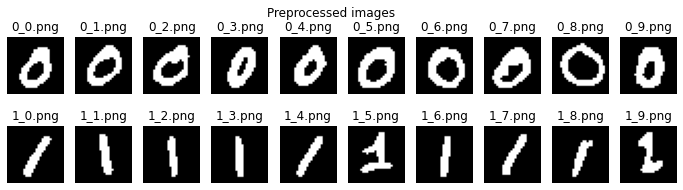

In [127]:
zeros = [preprocess_image(im) for im in zeros_im]
ones = [preprocess_image(im) for im in ones_im]

# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

#### Discussion

We noticed that the digit images are from the MNIST dataset, which is a dataset of handwritten digits. The images are 28x28 pixels, and the digits are centered in the image. The background is black, and the digits are white.

Since the MNIST dataset has been already preprocessed to some extent, we have decided to apply only a few preprocessing steps:
- **Gaussian filter**: to smooth the image and remove noise. It is important to remove noise because it can affect the contour detection.
- **Otsu's method**: to binarize the image using the Otsu thresholding method. This method is useful because it is able to detect the threshold value that minimizes the intra-class variance of the thresholded black and white pixels.
- **Morphological opening**: to remove small objects (noise). This step is to make sure that the contours are not affected by small objects.

We have decided to apply these steps because they are the most common preprocessing steps for handwritten digit recognition. We have also tried to apply other preprocessing steps, such as dilation, but they did not improve the results.

### 1.2. Get descriptors (4 pts)

To get the descriptors, we will apply the following steps:
1. Find the contours of the image using the `find_contours` function from `skimage.measure`.
2. Use the outermost contour for "0" digits.
3. Interpolate the contours to obtain a fixed number (N) of equidistant points.
4. Calculate the Fourier descriptors using the `fft` function from `scipy`.

In [128]:
import numpy as np
from skimage.measure import find_contours
from scipy.interpolate import interp1d
from scipy.fft import fft

def interpolate_contour(contour, num_points):
    x = contour[:, 1]
    y = contour[:, 0]
    t = np.linspace(0, 1, len(x))

    fx = interp1d(t, x, kind='cubic', fill_value="extrapolate")
    fy = interp1d(t, y, kind='cubic', fill_value="extrapolate")

    new_t = np.linspace(0, 1, num_points)
    new_x = fx(new_t)
    new_y = fy(new_t)

    return np.column_stack((new_x, new_y))

def get_descriptors(img, num_points=100):
    # Find contours
    contours = find_contours(img, 0.5)

    # Select the outermost contour for "0" digits
    if len(contours) > 1:
        contour = sorted(contours, key=lambda x: -x.shape[0])[0]
    else:
        contour = contours[0]

    # Interpolate the contour to obtain a fixed number of equidistant points
    contour_interp = interpolate_contour(contour, num_points)

    # Calculate the Fourier descriptors
    descriptors = fft(contour_interp[:, 0] + 1j * contour_interp[:, 1])

    return descriptors

# Check first 10 descriptors of a test image (just to check that your pipeline works well)
print(get_descriptors(zeros[0])[:10])

[ 1.39172622e+03+1.50672681e+03j  8.55252147e+00+8.47405703e+02j
 -2.82337937e+01+1.00634520e+01j  6.32235514e+01+2.16566688e+01j
 -1.06128074e+01-1.79170430e+01j  1.69314991e+01+2.66665587e+00j
  1.22645923e+00+6.91619002e+00j  2.07327415e+00-5.87543782e+00j
  7.37999903e+00+5.32678957e-01j  1.87562483e+00+9.74215781e-01j]


#### Discussion

The Fourier descriptors are computed from the interpolated contour points. Interpolation is necessary to ensure that each contour has the same number of points, which is critical for calculating the Fourier descriptors. This is because the Fourier transform assumes that the input signal has a fixed number of points. By using interpolation, we can make a fair comparison between the descriptors of different images.

What is necessary to note is that interpolation could potentially introduce artifacts or smooth out some critical features of the contour, affecting the descriptors' values. Therefore, it is essential to choose an appropriate interpolation method and the right number of points to ensure that the key contour characteristics are preserved.

### 1.3. Study effect of descriptors (6 pts)

In [129]:
# Define increasing set sizes of the descriptors. You can also change these numbers.
descr_set_sizes = [1, 2, 5, 10, 20]

# Define images for which you will show the recovery. You can also change the indexes.
zero = zeros_im[0]
one = ones_im[0]

In [130]:
from scipy.fft import ifft


def reconstruct_contour(descriptors, num_descriptors):
    # Make a copy of the descriptors
    modified_descriptors = np.copy(descriptors)
    # Keep the specified number of positive and negative frequencies and set the rest to 0
    modified_descriptors[num_descriptors + 1: -num_descriptors] = 0
    # Perform inverse Fourier transform
    contour_reconstructed = ifft(modified_descriptors)

    return contour_reconstructed.real, contour_reconstructed.imag

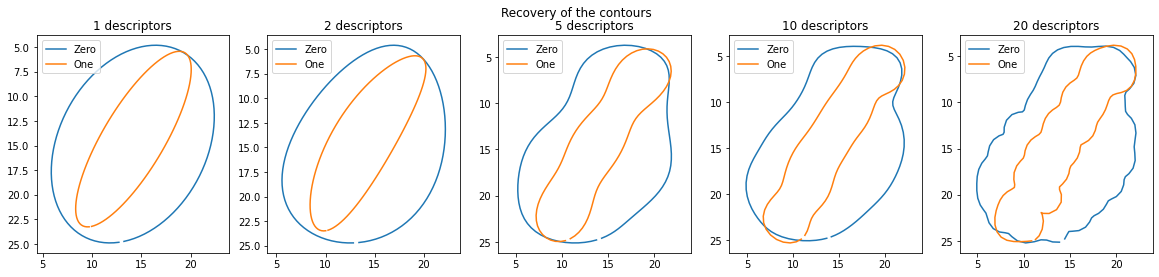

In [131]:
# Plot recovery for a zero image and a one image
fig, axes = plt.subplots(1, 5, figsize=(20, 4))

zero_descriptors = get_descriptors(zero)
one_descriptors = get_descriptors(one)

for i, num_descriptors in enumerate(descr_set_sizes):
    # Reconstruct contours for zero and one images
    zero_x, zero_y = reconstruct_contour(zero_descriptors, num_descriptors)
    one_x, one_y = reconstruct_contour(one_descriptors, num_descriptors)

    # Plot reconstructed contours
    axes[i].plot(zero_x, zero_y, label='Zero')
    axes[i].plot(one_x, one_y, label='One')
    axes[i].set_title(f"{num_descriptors} descriptors")
    axes[i].invert_yaxis()
    axes[i].axis("equal")
    axes[i].legend()

fig.suptitle("Recovery of the contours")
plt.show()

#### Discussion

The plots show the recovery of the contours of a "0" and a "1" image using different numbers of Fourier descriptors. As the number of descriptors increases, the reconstructed contours become more accurate and resemble the original shapes more closely.

With only 1 or 2 descriptors, the contours are not well reconstructed, and the shapes are barely recognizable. However, as we increase the number of descriptors to 5, the shapes start to become more recognizable. With 10 descriptors, the shapes become even more accurate, and the contours are quite close to the original ones. With 20 descriptors, the contours are almost perfectly reconstructed.

The results show that the Fourier descriptors can capture the shape of the contours effectively, and increasing the number of descriptors improves the accuracy of the reconstruction. However, we think that in many practical applications, a moderate number of descriptors (e.g., 10) is sufficient to capture the main characteristics of the shape, and using more descriptors may not provide significant improvements in accuracy but can increase computational complexity.

### 1.4 Clustering (2 pts)

In [132]:
def extract_features(descriptors):
    # Use the 1st and 2nd positive Fourier descriptors
    return np.abs(descriptors[1]), np.abs(descriptors[2])

# Compute the features for all "0"s and "1"s
zeros_features = np.array([extract_features(get_descriptors(img)) for img in zeros])
ones_features = np.array([extract_features(get_descriptors(img)) for img in ones])


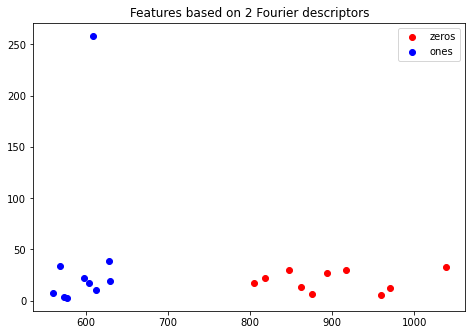

In [133]:
# TODO: You should fill the lists below, with your features

# First feature for all "0"s
zeros_f1 = zeros_features[:, 0]
# Second feature for all "0"s
zeros_f2 = zeros_features[:, 1]
# First feature for all "1"s
ones_f1 = ones_features[:, 0]
# Second feature for all "1"s
ones_f2 = ones_features[:, 1]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
ax.scatter(ones_f1, ones_f2, color='b', label='ones')
ax.legend(loc='best')
plt.title("Features based on 2 Fourier descriptors")
plt.show()

#### Discussion


The plot shows that the features based on the 1st and 2nd positive Fourier descriptors can successfully separate the "0"s and "1"s into distinct clusters. This indicates that the chosen Fourier descriptors effectively capture the main differences between the shapes of these digits. The 1st and 2nd Fourier descriptors represent the primary shape information and contour details of the digits, which is why they are useful for distinguishing between "0" and "1".

The success of the clustering can be attributed to the fact that "0" and "1" have different shapes and contours, which are well represented by the selected Fourier descriptors. For example, "0" has a circular shape with a hole in the center, while "1" has a simple linear shape. The 1st and 2nd positive Fourier descriptors capture these differences, allowing the clustering algorithm to effectively separate the two groups of digits.

### 1.5 Transformation invariance (6 pts)

#### Preliminary discussion

To make the features invariant to different transformations, we need to normalize the Fourier descriptors as follows:

1. **Translation invariance**: Translation invariance can be achieved by eliminating the zero-frequency component (DC component) of the Fourier descriptors, which involves setting the first Fourier descriptor to 0.
2. **Rotation invariance**: To attain rotation invariance, divide all Fourier descriptors by the phase of the first non-zero Fourier descriptor, which normalizes the angle of the first non-zero Fourier descriptor to 0.
3. **Scale invariance**: Scale invariance can be obtained by dividing all Fourier descriptors by the magnitude of the first non-zero Fourier descriptor, effectively normalizing the magnitude of the first non-zero Fourier descriptor to 1.

#### Implementation

First, we define randomized transformation functions for the digit images.

In [134]:
from skimage import morphology
# Define custom rotation function. You may add other parameters to the function.
def random_rotate(img):
    angle = np.random.uniform(0, 360)
    return skimage.transform.rotate(img, angle)

# Define custom rotation function. You may add other parameters to the function.
def random_translate(img):
    shift_x = np.random.randint(-2, 2)
    shift_y = np.random.randint(-2, 2)
    return np.roll(np.roll(img, shift_x, axis=0), shift_y, axis=1)

def random_scale(img):
    # Define the scaling factor
    scale_factor = np.random.uniform(1,2)

    # Perform dilation on the binary image
    dilated_image = morphology.dilation(img, morphology.disk(scale_factor))

    # Perform erosion on the dilated image to get back the original size
    eroded_image = morphology.erosion(dilated_image, morphology.disk(scale_factor))
    
    return eroded_image

In [135]:
# We will define 4 sets of new images below
rotated_images_zeros = [random_rotate(img) for img in zeros_im]
rotated_images_ones = [random_rotate(img) for img in ones_im]

translated_images_zeros = [random_translate(img) for img in zeros_im]
translated_images_ones = [random_translate(img) for img in ones_im]

scaled_images_zeros = [random_scale(img) for img in zeros_im]
scaled_images_ones = [random_scale(img) for img in ones_im]

transformed_images_zeros = [random_scale(random_translate(random_rotate(img))) for img in zeros_im]
transformed_images_ones = [random_scale(random_translate(random_rotate(img))) for img in ones_im]

We want to visualize the transformations to make sure we do not lose information. $T_1$, $T_2$, $T_3$, and $T_4$ correspond respectively to translated, rotated, scaled and transformed images 

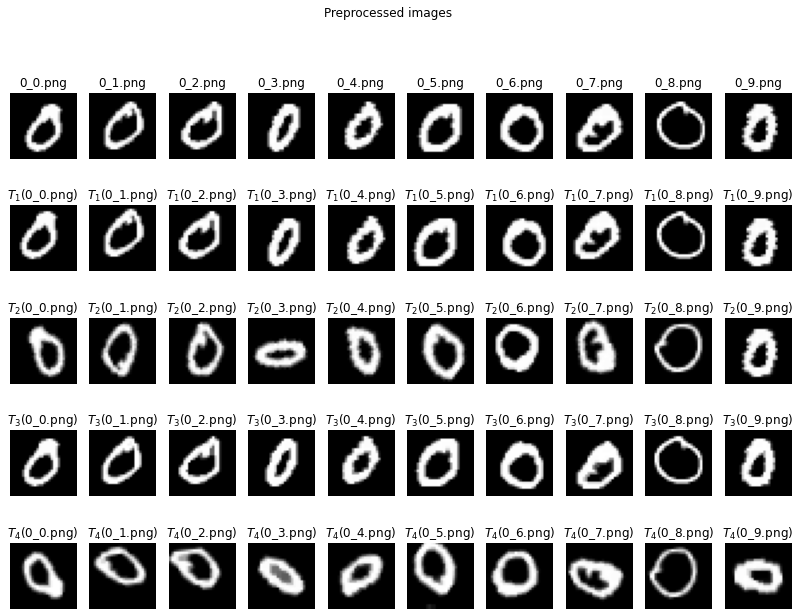

In [136]:
fig, axes = plt.subplots(5, len(zeros_im), figsize=(14, 10))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], translated_images_zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title("$T_1$(" + nm + ")")
for ax, im, nm in zip(axes[2], rotated_images_zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title("$T_2$(" + nm + ")")
for ax, im, nm in zip(axes[3], scaled_images_zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title("$T_3$(" + nm + ")")
for ax, im, nm in zip(axes[4], transformed_images_zeros, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title("$T_4$(" + nm + ")")
fig.suptitle("Preprocessed images")
plt.show()

The figure above confirms that our functions correctly transform the images. To make the features invariant to these transformations, we need to consider the following:

1. **Translation**: Since translation only affects the first Fourier descriptor, we don't need to modify the second and third Fourier descriptors for translation invariance.

2. **Rotation**: As we are only exploiting the absolute value of the descriptors, the phase shift caused by rotation does not affect the descriptors. Thus, the features are already rotation-invariant.

3. **Scaling**: To achieve scale invariance, we need to divide the descriptors by the magnitude of the next non-zero descriptor. As we saw during the class, the ratio $\frac{f_i}{f_j}$ is invariant to scaling when $i \neq j$.

4. **Transformation**: We need to apply all the above transformations, which ensures that the features are invariant to translation, rotation, and scaling.

In [137]:
def get_invariant_features(img, translation=True, rotation=True, scale=True):
    descriptors = get_descriptors(img)
    if translation:
        pass
    if rotation:
        pass
    if scale:
        next_descriptors = np.roll(descriptors, 1)
        for i, descriptor in enumerate(next_descriptors):
            if descriptor == 0:
                 next_descriptors[i] = np.nonzero(next_descriptors[i:-1])[0][0]                
        descriptors = descriptors / next_descriptors
                
    return extract_features(descriptors)

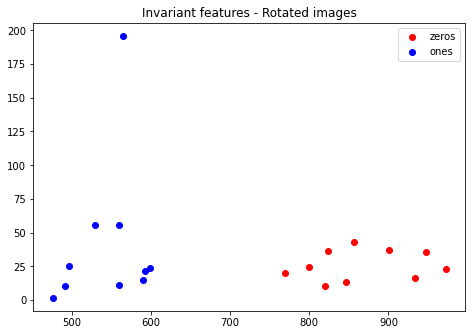

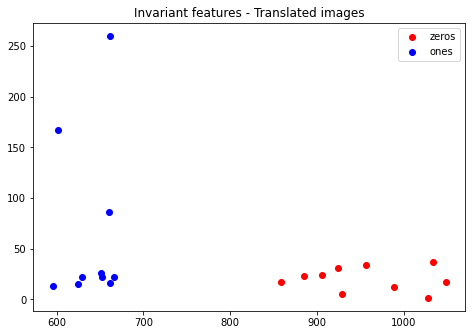

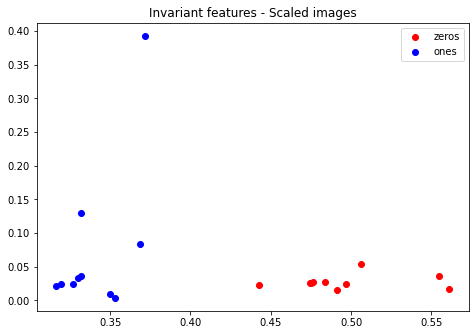

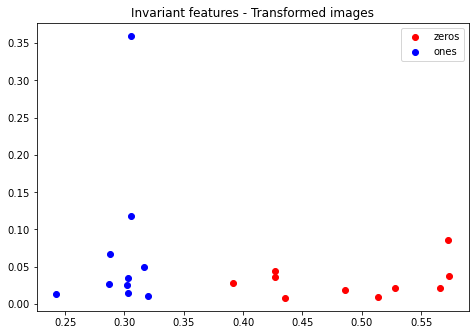

In [138]:
# For each of the 4 sets of "0"s and "1"s above, you should find the invaiant features
# and make a plot (similar to section 1.4) - 4 plots in total!
# Use a proper labeling/legend for the plots!


def plot_invariant_features(images_zeros, images_ones, inv_to_rotation, inv_to_translation, inv_to_scale, title):
    zeros_features = [get_invariant_features(img, inv_to_rotation, inv_to_translation, inv_to_scale) for img in images_zeros]
    ones_features = [get_invariant_features(img, inv_to_rotation, inv_to_translation, inv_to_scale) for img in images_ones]
    zeros_f1, zeros_f2 = zip(*zeros_features)
    ones_f1, ones_f2 = zip(*ones_features)
    
    fig = plt.figure()
    ax = fig.add_axes([0, 0, 1, 1])
    ax.scatter(zeros_f1, zeros_f2, color='r', label='zeros')
    ax.scatter(ones_f1, ones_f2, color='b', label='ones')
    ax.legend(loc='best')
    plt.title(title)
    plt.show()

plot_invariant_features(rotated_images_zeros, rotated_images_ones, False, True, False, "Invariant features - Rotated images")
plot_invariant_features(translated_images_zeros, translated_images_ones, True, False, False, "Invariant features - Translated images")
plot_invariant_features(scaled_images_zeros, scaled_images_ones, False, False, True, "Invariant features - Scaled images")
plot_invariant_features(transformed_images_zeros, transformed_images_ones, True, True, True, "Invariant features - Transformed images")

#### Discussion

The results obtained are quite satisfactory, as the hyperplane separating the features of each digit remains well-defined. Although the hyperplane is not perfectly centered on the origin, it still effectively distinguishes between the digits. This is because the transformation functions, while not perfect, effectively transform the images and make the features invariant to the applied transformations. As a result, the clustering algorithm can successfully separate the digits into distinct clusters.

## PART 2 - region based descriptors (10 pts)

In this part, you will use the "2"s and "3"s images.

**Objectives overview**:

**1)** *Cluster on compacity*: Based on custom definitions of perimeter and area for each image of "2" and "3" (preprocessed - by you), make a 2D plot with 2-dimensional feature vectors, similar to section 1.4. After that, define the compacity feature for each "2"s and "3"s image. Are you still able to obtain a 1D plot with values clustered in 2 well-defined regions? Discuss your findings. (**6 pts**).

**2)** *Additional method*: Choose one more region-based method (from the course or your own sources - internet allowed) and redo the 1D plot in section 2.1 (or 2D plot, depending on your choosing). Explain your method and your findings. (**4 pts**)

### 2.1. Cluster on compacity (6 pts)

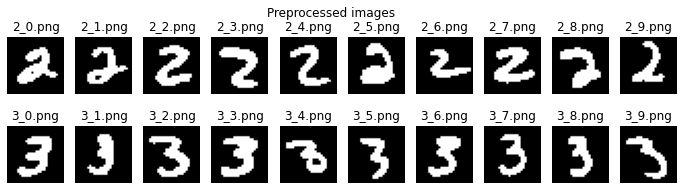

In [139]:
# TODO
twos = [preprocess_image(im) for im in twos_im]
threes = [preprocess_image(im) for im in threes_im]
    
# Plot images
fig, axes = plt.subplots(2, len(zeros), figsize=(12, 3))
for ax, im, nm in zip(axes[0], twos, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], threes, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
fig.suptitle("Preprocessed images")
plt.show()

In [140]:
from skimage.measure import label, regionprops

def compute_area(preprocessed_image):
    return np.count_nonzero(preprocessed_image)

def compute_perimeter(preprocessed_image):
    region_labels = label(preprocessed_image)
    regions = regionprops(region_labels)
    return regions[0].perimeter

def compute_compacity(preprocessed_image):
    P = compute_perimeter(preprocessed_image)
    A = compute_area(preprocessed_image)
    return P ** 2 / A

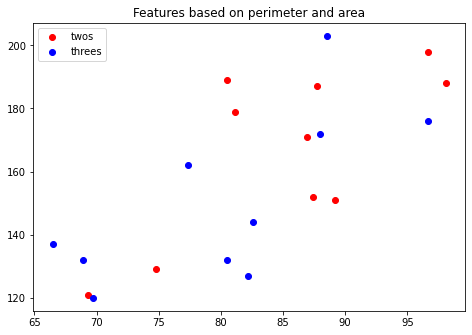

In [141]:
# TODO: Fill the arrays below with the perimeter and area as features for "2"s and "3"s images
twos_f1 = [compute_perimeter(im) for im in twos]
twos_f2 = [compute_area(im) for im in twos]
threes_f1 = [compute_perimeter(im) for im in threes]
threes_f2 = [compute_area(im) for im in threes]

# Plot features for all images
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(twos_f1, twos_f2, color='r', label='twos')
ax.scatter(threes_f1, threes_f2, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on perimeter and area")
plt.show()

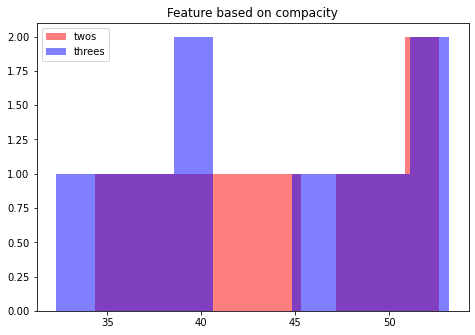

In [142]:
# TODO: Make the 1D plot of the compacity
twos_f3 = [compute_compacity(im) for im in twos]
threes_f3 = [compute_compacity(im) for im in threes]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.hist(twos_f3, color='r', label='twos', alpha=0.5)
ax.hist(threes_f3, color='b', label='threes', alpha=0.5)
ax.legend(loc='best')
plt.title("Feature based on compacity")
plt.show()

####  Discussion

In this part, we create a 2D plot with features based on the perimeter and area to analyze the separation between the "2"s and "3"s clusters. Although there is some separation, it is not perfect due to the overlap between the two classes. This is expected as "2"s and "3"s are similar in shape, leading to comparable areas and perimeters.

We then compute the compacity ($P^2/A$) and plot it as a 1D histogram to further examine the separation between "2"s and "3"s. The histogram reveals that the distributions are not well-separated using compacity alone, with a significant overlap between the two. This indicates that compacity is not the most suitable descriptor for differentiating "2"s and "3"s in the MNIST dataset, suggesting the need for other features or descriptors to achieve better separation. Additionally, improving the preprocessing of the images may enhance the separation between the two classes.

Furthermore, the `label` and `regionprops` functions from `skimage.measure` are used to compute the perimeter of the preprocessed images. The label function labels connected regions in the binary image, while the `regionprops` function calculates properties for each labeled region. In this case, we retrieve the perimeter property of the first (and only) region of interest, which corresponds to the digit in the preprocessed image.

### 2.2. Additional method (4 pts)

The additional method consists in using special features to cluster the best way possible the "2"s and "3"s. We will use the following features:

- Eccentricity (ratio of the major axis length to the minor axis length of the ellipse that has the same second-moments as the region). This feature will be represented on a 1D histogram.

- Major axis length (length of the major axis of the ellipse that has the same normalized second central moments as the region) and minor axis length (length of the minor axis of the ellipse that has the same normalized second central moments as the region). These features will be represented on a 2D plot.

We chose two different method because they represent the same information in different ways. The eccentricity is a ratio of two features, while the major and minor axis length are these two different features.

In [143]:
def compute_feature(img, feature_type):
    # Label the connected components in the binary image
    labeled_image = label(img)

    # Get the properties of the labeled regions
    regions = regionprops(labeled_image)

    if feature_type == 'eccentricity':
        feature = regions[0].eccentricity
    
    if feature_type == 'axis_length':
        feature = regions[0].major_axis_length, regions[0].minor_axis_length
    
    return feature

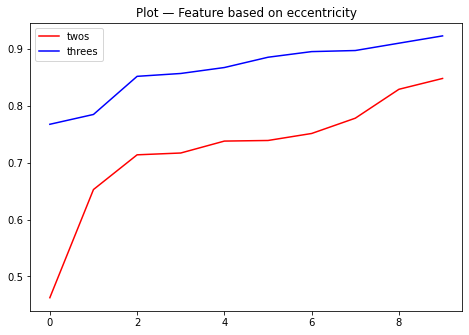

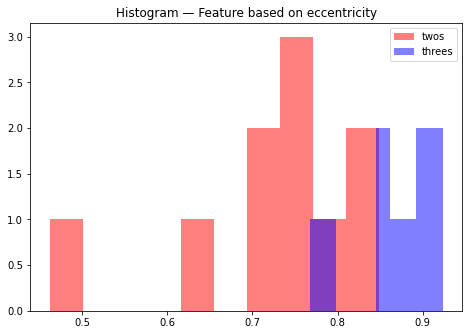

In [144]:
# TODO: Make the 1D plot of the compacity
twos_f4 = [compute_feature(im, "eccentricity") for im in twos]
twos_f4.sort()
threes_f4 = [compute_feature(im, "eccentricity") for im in threes]
threes_f4.sort()

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(twos_f4, color='r', label='twos', alpha=1)
ax.plot(threes_f4, color='b', label='threes', alpha=1)
ax.legend(loc='best')
plt.title("Plot — Feature based on eccentricity")
plt.show()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.hist(twos_f4, color='r', label='twos', alpha=0.5)
ax.hist(threes_f4, color='b', label='threes', alpha=0.5)
ax.legend(loc='best')
plt.title("Histogram — Feature based on eccentricity")
plt.show()

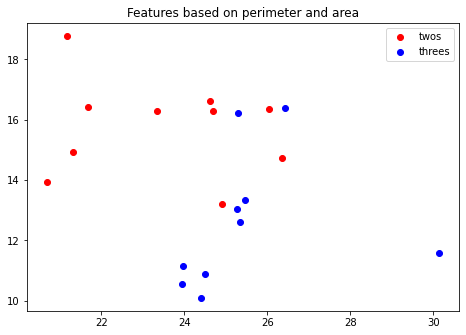

In [145]:
twos_features = [compute_feature(im, "axis_length") for im in twos]
threes_features = [compute_feature(im, "axis_length") for im in threes]

twos_f5, twos_f6 = zip(*twos_features)
threes_f5, threes_f6 = zip(*threes_features)

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.scatter(twos_f5, twos_f6, color='r', label='twos')
ax.scatter(threes_f5, threes_f6, color='b', label='threes')
ax.legend(loc='best')
plt.title("Features based on perimeter and area")
plt.show()

The eccentricity feature produces a 1D histogram that is well separated between the "2"s and "3"s. The major and minor axis length features produce a 2D plot that is also well separated between the "2"s and "3"s.

#### Discussion

Before trying with the `axis_length`-linked features, other features were tested. From what we know of the shape of two digits, the "3"s usually have a centroid shifted to the right while the "2"s have a centered centroid generally. However, the centroid feature was found to be inneficcient in separating the two classes. Indeed, handwritten digits do not necessarily respect this condition. 
On the other hand, an observation on the elongation of each digits was made. Compared to the "2"s, the "3"s are usually elongated vertically. This fact means that the `minor_axis_length` might cluster well the two classes. This was verified on the 2D plot where the two classes can mostly be separated with a horizontal line, meaning that the `minor_axis_length` is the most predictive feature of the two with `major_axis_length`.